In [1]:
# Import IBKR data fetcher
import asyncio
import importlib

# Reload config and ibkr_data_async to pick up any changes (important if you modified config.py)
import config
importlib.reload(config)
import ibkr_data_async
importlib.reload(ibkr_data_async)
from ibkr_data_async import DataFetcherAsync
from config import IBKR_HOST, IBKR_PORT, IBKR_CLIENT_ID

# Verify the port being used
print(f"Connecting to IBKR at {IBKR_HOST}:{IBKR_PORT}")
print(f"Client ID: {IBKR_CLIENT_ID}")

IBKR_PORT = 4001

# Set your tickers and years here
tickers = ["TLT"]
years = 30
force_refresh = False  # Set to True to bypass cache and re-download

# Initialize and connect (explicitly pass port to avoid caching issues)
fetcher = DataFetcherAsync(
    host=IBKR_HOST,
    port=IBKR_PORT,  # This will use the reloaded config value
    client_id=IBKR_CLIENT_ID
)

# Connect to IBKR (make sure TWS/Gateway is running!)
await fetcher.connect()
print("Connected to IBKR!")

# Fetch data for multiple tickers
all_data = await fetcher.fetch_all_tickers_data(
    tickers=tickers,
    years=years,
    force_refresh=force_refresh,
    max_concurrent=5
)

# Display results
for ticker, df in all_data.items():
    if df is not None:
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df.index.min()} to {df.index.max()}")
        print(f"  First few rows:")
        print(df.head())

# Disconnect when done
fetcher.ib.disconnect()
print("\nDisconnected from IBKR")


Connecting to IBKR at 127.0.0.1:7496
Client ID: 1


Error 321, reqId -1: Error validating request.-'ct' : cause - The API interface is currently in Read-Only mode.
Error 321, reqId -1: Error validating request.-'b3' : cause - The API interface is currently in Read-Only mode.
open orders request timed out
completed orders request timed out


Connected to IBKR!

TLT:
  Shape: (5593, 8)
  Date range: 0 to 5592
  First few rows:
        date   open   high    low  close   volume    average  barCount
0 2002-08-19  46.88  46.88  46.85  46.85   2000.0  46.845638         1
1 2002-08-21  47.32  47.32  47.32  47.32   1000.0  47.319661         1
2 2002-09-03  48.45  48.46  48.43  48.43   1800.0  48.427553         1
3 2002-09-05  48.73  48.83  48.64  48.74  13200.0  48.736219         1
4 2002-09-06  48.35  48.35  48.10  48.10   1900.0  48.102351         1

Disconnected from IBKR


In [4]:
from data_cleaning import Data
import pickle_utils
importlib.reload(pickle_utils)
from pickle_utils import save_pickle_data

data_processor = Data(
    tickers=["TLT"],
    dfs=all_data,
    years=30
)



# clean_data() returns a dictionary: {'SPY': DataFrame, ...}
cleaned_data = data_processor.clean_data()
TLT_df = cleaned_data["TLT"]

save_pickle_data("TLT", TLT_df)

# Access the DataFrame using the ticker as key


TLT_df.head()

Saved TLT to /Users/shrey/Desktop/Research/data/pickle/TLT.xz


,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2002-08-19 00:00:00+00:00,46.88,46.88,46.85,46.85,2000.0,46.845638,1,NaN,NaN,19,0,8,2002
2002-08-21 00:00:00+00:00,47.32,47.32,47.32,47.32,1000.0,47.319661,1,0.010032,0.009982,21,2,8,2002
2002-09-03 00:00:00+00:00,48.45,48.46,48.43,48.43,1800.0,48.427553,1,0.023457,0.023186,3,1,9,2002
2002-09-05 00:00:00+00:00,48.73,48.83,48.64,48.74,13200.0,48.736219,1,0.006401,0.006381,5,3,9,2002
2002-09-06 00:00:00+00:00,48.35,48.35,48.10,48.10,1900.0,48.102351,1,-0.013131,-0.013218,6,4,9,2002


In [5]:
import importlib
from json import load
import pickle_utils
importlib.reload(pickle_utils)  # Reload to pick up the new function
from pickle_utils import load_all_pickle_data

# Load all tickers from pickle files

tickers = ["TLT"]
all_data = load_all_pickle_data(tickers = tickers)

all_data["TLT"].head()

,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2002-08-19 00:00:00+00:00,46.88,46.88,46.85,46.85,2000.0,46.845638,1,NaN,NaN,19,0,8,2002
2002-08-21 00:00:00+00:00,47.32,47.32,47.32,47.32,1000.0,47.319661,1,0.010032,0.009982,21,2,8,2002
2002-09-03 00:00:00+00:00,48.45,48.46,48.43,48.43,1800.0,48.427553,1,0.023457,0.023186,3,1,9,2002
2002-09-05 00:00:00+00:00,48.73,48.83,48.64,48.74,13200.0,48.736219,1,0.006401,0.006381,5,3,9,2002
2002-09-06 00:00:00+00:00,48.35,48.35,48.10,48.10,1900.0,48.102351,1,-0.013131,-0.013218,6,4,9,2002


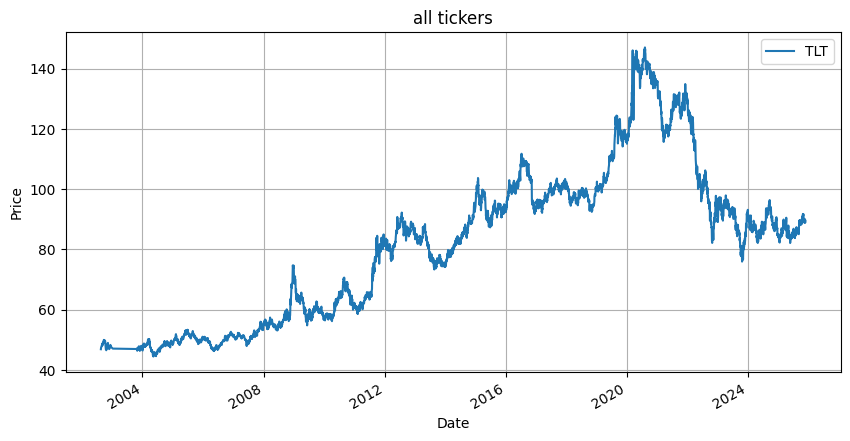

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

for ticker, df in all_data.items():
    ax.plot(df.index, df['close'], label = ticker)

ax.set_title("all tickers")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()
plt.show()